<a href="https://colab.research.google.com/github/bpayton0101/AAI-520-Final-Project/blob/main/001_0_pre_processing_data_exploration_movie_lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Building a Chat Bot using AI with movie scripts dataset
# https://medium.com/analytics-vidhya/building-a-chat-bot-using-ai-with-movie-scripts-dataset-f18fc1f9629e
# https://github.com/douglasdcm/chatbot_for_movies/blob/master/notebooks/001.0%20-%20data_exploration_movie_lines_msg.ipynb

In [ ]:
import pandas as pd
import re
#import gensim
import numpy as np
#from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial import distance

In [ ]:
#setting parameters for data visualization
np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision', 2) # Use 'display.precision' to set the display precision for floats.

In [ ]:
# Prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:


import pandas as pd
with open('/content/drive/My Drive/movie-corpus/movie_lines.txt', 'r', encoding='ISO-8859-2') as f:
  lines = f.readlines()

messages = []
for line in lines:
  parts = line.strip().split('\t')  # Split by tab
  if len(parts) >= 4:  # Ensure we have enough parts
    messages.append(parts)

messages = pd.DataFrame(messages)


In [ ]:
messages.columns = [f'col_{i}' for i in range(32)] # Create generic column names for all 32 columns

In [ ]:
messages.head(10)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31
0,L133441 +++$+++ u4505 +++$+++ m298 +++$+++ KAN...,,,"eighty- two thousand, six hundred and thirty-o...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,L165234 +++$+++ u4845 +++$+++ m323 +++$+++ KAR...,,,,,,*,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,L165233 +++$+++ u4843 +++$+++ m323 +++$+++ HAN...,,,* police come they'll waste hours trying to ne...,,,* for this man. Until then...we do not alter ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,L165580 +++$+++ u4850 +++$+++ m323 +++$+++ THE...,,,,* you were talking about. We broke through on...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,L165145 +++$+++ u4844 +++$+++ m323 +++$+++ HOL...,,,,,,*,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,L165114 +++$+++ u4849 +++$+++ m323 +++$+++ TAK...,,,* I can recognize someone who just got off one...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,L377409 +++$+++ u6563 +++$+++ m436 +++$+++ LEO...,,* look people in the eye when I talk to,,,* them.,,,,,,,*,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,L377408 +++$+++ u6560 +++$+++ m436 +++$+++ BUR...,,,,,,,*,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,L377005 +++$+++ u6560 +++$+++ m436 +++$+++ BUR...,,,,,,,*,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9,L377002 +++$+++ u6563 +++$+++ m436 +++$+++ LEO...,,,,,*,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


### Data exploration

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col_0   100 non-null    object
 1   col_1   100 non-null    object
 2   col_2   100 non-null    object
 3   col_3   100 non-null    object
 4   col_4   94 non-null     object
 5   col_5   79 non-null     object
 6   col_6   66 non-null     object
 7   col_7   52 non-null     object
 8   col_8   38 non-null     object
 9   col_9   33 non-null     object
 10  col_10  25 non-null     object
 11  col_11  22 non-null     object
 12  col_12  19 non-null     object
 13  col_13  15 non-null     object
 14  col_14  14 non-null     object
 15  col_15  8 non-null      object
 16  col_16  8 non-null      object
 17  col_17  6 non-null      object
 18  col_18  5 non-null      object
 19  col_19  5 non-null      object
 20  col_20  5 non-null      object
 21  col_21  5 non-null      object
 22  col_22  4 non-null      obj

In [ ]:
messages.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31
count,100,100,100,100,94,79,66,52,38,33,25,22,19,15,14,8,8,6,5,5,5,5,4,4,4,3,3,3,3,3,2,1
unique,100,1,7,17,26,18,14,13,11,11,7,4,6,5,6,4,3,4,1,5,1,2,2,2,3,1,1,2,1,2,2,1
top,L133441 +++$+++ u4505 +++$+++ m298 +++$+++ KAN...,,,,,,,,,,,,,,,,,,,* remember them. My wife deserves,,,,,,,,,,,*,*
freq,1,100,94,84,66,57,49,32,28,22,17,19,13,11,7,5,5,3,5,1,5,4,3,3,2,3,3,2,3,2,1,1


In [ ]:
# Check the available columns in the DataFrame
print(messages.columns)

# Access data using an existing column name
# Replace 'actual_column_name' with a valid column identifier from the output above
data = messages['col_0'] # replace 'col_0' with an actual column name from the output above

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14',
       'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21',
       'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28',
       'col_29', 'col_30', 'col_31'],
      dtype='object')


<Axes: >

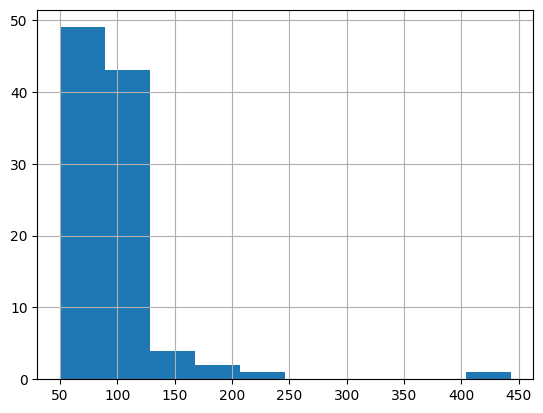

In [ ]:
#histogram to display the number of character of each message
data.str.len().hist()

## Value types
- all valuesare strings

In [ ]:
#checking the average word length
data_set = [type(item) for item in data]
data_set = set(data_set)
data_set

{str}

## Print float values

In [ ]:
float_val = [it for it in data if isinstance(it, float)]
print(len(float_val))
float_val = set(float_val)
print(float_val)

0
set()


In [ ]:
# Check the column names in the DataFrame.
print(messages.columns)

# Replace 'msg' with the actual column name you want to access
# Assuming the column you want to check for NaN values is 'col_0'
messages[messages['col_0'].isna()]

# If you intended to create a new column named 'msg' with NaN values, use:
messages['msg'] = np.nan

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14',
       'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21',
       'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28',
       'col_29', 'col_30', 'col_31'],
      dtype='object')


### Number of words for each message
- The number of words are between 0 and 1000
- the majority is in 0 to 500

<Axes: >

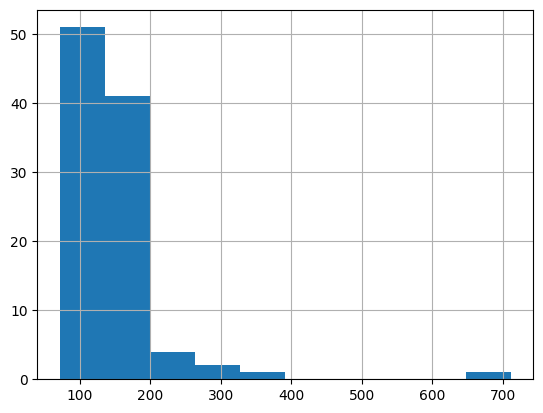

In [ ]:
#number of words for each message
data.str.split(' ').\
    map(lambda x: len(str(x))).\
    hist()

### Average word length
- The length of words goes from 0 to 15

<Axes: >

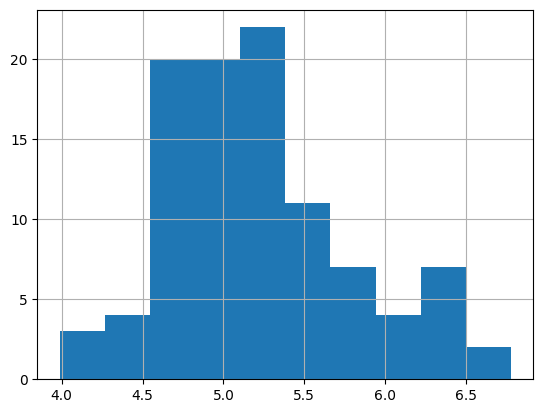

In [ ]:
#checking the average word length
data.str.split(' ').\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#checkig the distribuition of stopwrds in the mesages
stop=set(stopwords.words('english'))
corpus=[]
msg_ = data.str.split()
msg_ = msg_.values.tolist()
corpus=[word for i in msg_ for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [ ]:
len(list(dic.values()))

71

In [ ]:
import matplotlib.pyplot as plt

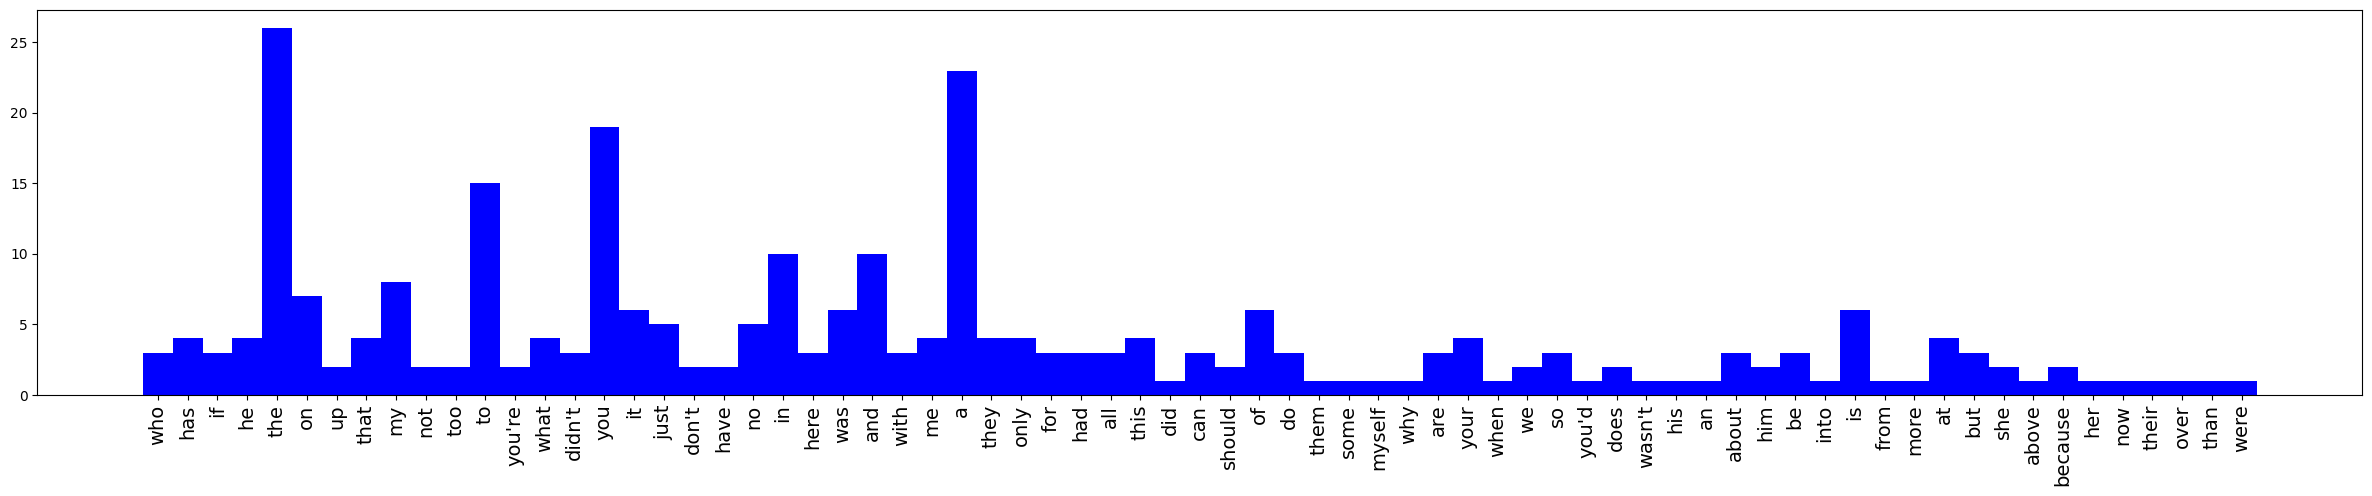

In [ ]:
x = dic.keys()
y = dic.values()
plt.subplots(figsize=(30,5))
plt.bar(x, y, 1, color='b')
plt.xticks(list(x), rotation=90, fontsize=14)
plt.show()

In [ ]:
from collections import Counter
import seaborn as sns

<Axes: >

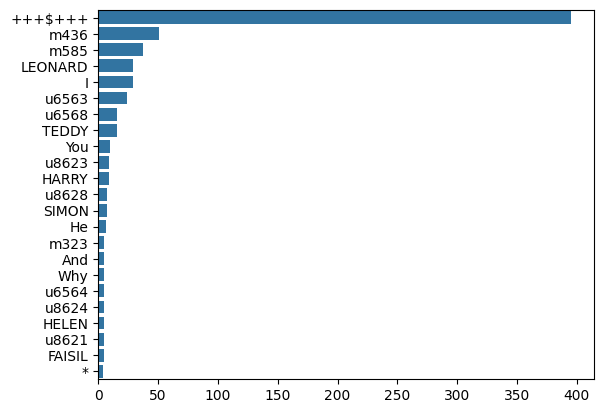

In [ ]:
#ploting the occurences of each word
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

In [ ]:
from nltk.util import ngrams

In [ ]:
#get the most frequent n-grams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [ ]:
def plot_n_gram(corpus, n=2):
    top_n_bigrams=get_top_ngram(corpus,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

In [ ]:
!pip install sklearn
#Import the CountVectorizer object from sklearn
from sklearn.feature_extraction.text import CountVectorizer

!pip install seaborn
import seaborn as sns #Import the seaborn module for plotting

#get the most frequent n-grams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) # this line was not indented properly
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()] # make sure to use vec.vocabulary_

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
#get the most frequent n-grams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    return words_freq # add a return statement to the function so that it returns the words_freq list

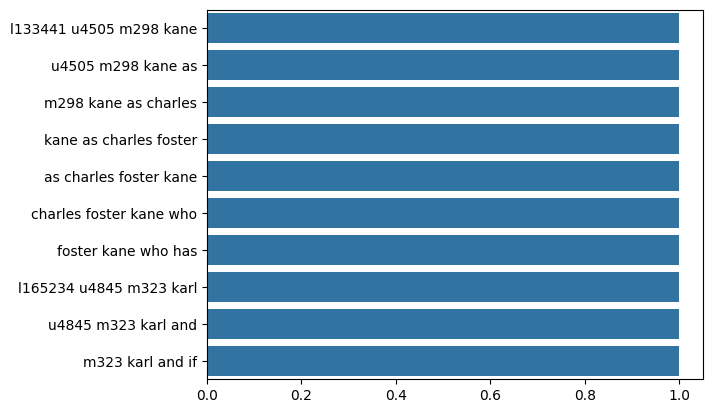

In [ ]:
plot_n_gram(data, 4)

### Sentimental analysis


In [ ]:
from textblob import TextBlob

In [ ]:
#checkig the polarity of the messages
def polarity(text):
    return TextBlob(text).sentiment.polarity

<Axes: >

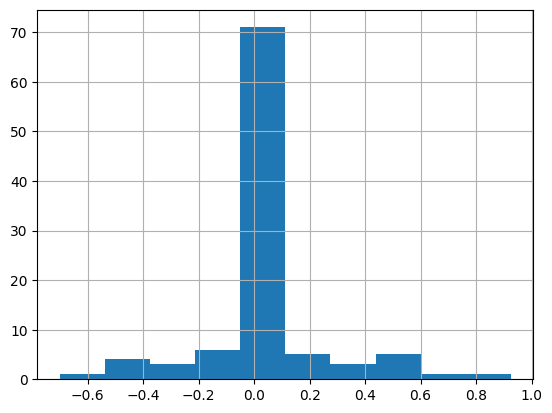

In [ ]:
messages['polarity_score']=data.\
   apply(lambda x : polarity(x))
messages['polarity_score'].hist()

- TYPE	DESCRIPTION
- PERSON	People, including fictional.
- NORP	Nationalities or religious or political groups.
- FAC	Buildings, airports, highways, bridges, etc.
- ORG	Companies, agencies, institutions, etc.
- GPE	Countries, cities, states.
- LOC	Non-GPE locations, mountain ranges, bodies of water.
- PRODUCT	Objects, vehicles, foods, etc. (Not services.)
- EVENT	Named hurricanes, battles, wars, sports events, etc.
- WORK_OF_ART	Titles of books, songs, etc.
- LAW	Named documents made into laws.
- LANGUAGE	Any named language.
- DATE	Absolute or relative dates or periods.
- TIME	Times smaller than a day.
- PERCENT	Percentage, including ”%“.
- MONEY	Monetary values, including unit.
- QUANTITY	Measurements, as of weight or distance.
- ORDINAL	“first”, “second”, etc.
- CARDINAL	Numerals that do not fall under another type.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
#transform the messages in a big document
def get_entities(corpus, int_limit=0, end_limit=100):
    msg_all = ' '.join(data[int_limit:end_limit])
    doc = nlp(msg_all)

    entity_list = [(x.text,x.label_) for x in doc.ents]

    return entity_list

In [ ]:
%%time

ent_list = set()
ent_list_res = set()
skip = 1000
i = 0
lim = len(data)
#lim = 3000

while(i < lim):
    ent_list = set(get_entities(data, i, i+skip))
    ent_list_res = ent_list_res.union(ent_list)
    i = i + skip
    print('Processed '+str(i)+' of '+str(lim)+' messages')

Processed 1000 of 100 messages
CPU times: user 983 ms, sys: 108 ms, total: 1.09 s
Wall time: 1.15 s


In [ ]:
len(ent_list_res)

38

In [ ]:
ent_list_res

{('Cairo', 'GPE'),
 ('Charles Foster Kane', 'PERSON'),
 ('Covert L627154 +++$', 'PERSON'),
 ('Craft', 'ORG'),
 ('Hardly', 'GPE'),
 ('James F. Grantz', 'PERSON'),
 ('Jean-Claude', 'PERSON'),
 ('Jimmy Grantz', 'PERSON'),
 ('John Edward Gammell', 'PERSON'),
 ('John G.', 'PERSON'),
 ('John G. Check', 'PERSON'),
 ('John L377612', 'PERSON'),
 ('K Street', 'FAC'),
 ('Key Bridge', 'FAC'),
 ('L377493', 'PERSON'),
 ('L377511', 'PERSON'),
 ('L377603', 'PERSON'),
 ('L558612', 'PERSON'),
 ('L627156', 'GPE'),
 ('L627174 +++$+++ u8624 +++$+++ m585 +++$+++ HELEN +++$+++', 'FAC'),
 ('L627417 +++$+++ u8623 +++$+++ m585 +++$+++ HARRY +++$+++ Why', 'FAC'),
 ('Leonard', 'PERSON'),
 ('Rome', 'GPE'),
 ('Sammy', 'PERSON'),
 ('Smithsonian', 'ORG'),
 ('Teddy', 'PERSON'),
 ('The Sand Spider', 'WORK_OF_ART'),
 ('Theo', 'PERSON'),
 ('Three', 'CARDINAL'),
 ('a day', 'DATE'),
 ('a little above market-', 'TIME'),
 ('half', 'CARDINAL'),
 ('second', 'ORDINAL'),
 ('ten years ahead', 'DATE'),
 ('the Florida Keys .', 'ORG

In [ ]:
ent_df = pd.DataFrame(list(ent_list_res))

In [ ]:
ent_df

,0,1
0,Teddy,PERSON
1,K Street,FAC
2,John L377612,PERSON
3,Leonard,PERSON
4,half,CARDINAL
5,L377603,PERSON
6,The Sand Spider,WORK_OF_ART
7,L558612,PERSON
8,two,CARDINAL
9,ultra- L627018,FAC


In [ ]:
ent_df.to_csv('/content/drive/My Drive/movie-corpus/movie_lines.txt', 'r', encoding='ISO-8859-2')

### Entity frequency


In [ ]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

In [ ]:
%%time
#count the number of each entity
ent=data.\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

CPU times: user 1.47 s, sys: 0 ns, total: 1.47 s
Wall time: 1.51 s


<Axes: >

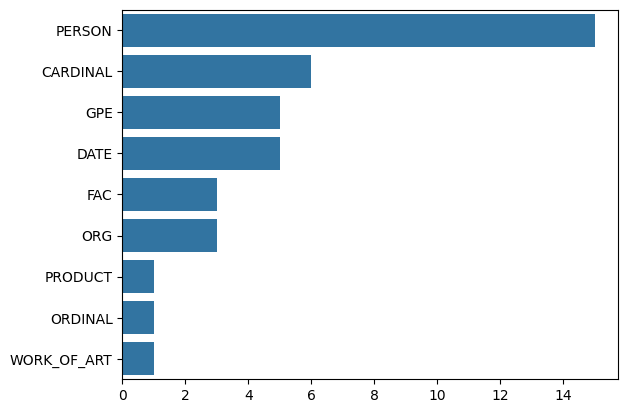

In [ ]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

### Most comon tokens per entity (not used)

In [ ]:
def ner(text,ent="PERSON"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

## Parts of Speach Tagging

There are eight main parts of speech:

- Noun (NN)- Joseph, London, table, cat, teacher, pen, city
- Verb (VB)- read, speak, run, eat, play, live, walk, have, like, are, is
- Adjective(JJ)- beautiful, happy, sad, young, fun, three
- Adverb(RB)- slowly, quietly, very, always, never, too, well, tomorrow
- Preposition (IN)- at, on, in, from, with, near, between, about, under
- Conjunction (CC)- and, or, but, because, so, yet, unless, since, if
- Pronoun(PRP)- I, you, we, they, he, she, it, me, us, them, him, her, this
- Interjection (INT)- Ouch! Wow! Great! Help! Oh! Hey! Hi!

In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
def remove_duplicated_spaces(corpus):
    #remove duplicated spaces
    corpus_alt = re.sub(r' +', ' ', corpus)

    return corpus_alt

In [ ]:
msg_no_space = [remove_duplicated_spaces(str(m)) for m in data]
msg_no_space = pd.Series(msg_no_space)

In [ ]:
def pos(text):
    #matched = re.match(r" +", text)
    if text != ' ':
        #print(text)
        pos=nltk.pos_tag(word_tokenize(text))
        #print(pos)
        pos=list(map(list,zip(*pos)))[1]
        return pos
    return

In [ ]:
!pip install nltk
import nltk

nltk.download('punkt') # Download the 'punkt' resource

def pos(text):
    #matched = re.match(r" +", text)
    if text != ' ':
        #print(text)
        pos=nltk.pos_tag(word_tokenize(text))
        #print(pos)
        pos=list(map(list,zip(*pos)))[1]
        return pos
    return

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<Axes: >

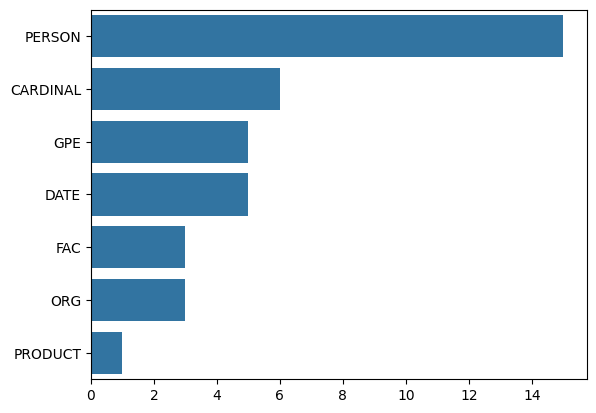

In [ ]:
x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

In [ ]:
### most commonly nouns
def get_adjs(text, _tag='PRP'):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag == _tag:
            adj.append(word)
    return adj

In [ ]:
%%time
# Create a sample list of strings (replace this with your actual data)
msg = ['This is a sample sentence.', 'Another sentence for testing.']

# Convert the list to a Pandas Series
import pandas as pd
msg = pd.Series(msg)

words = msg.apply(lambda x: get_adjs(x))
words = [x for l in words for x in l]
counter = Counter(words)

CPU times: user 95.8 ms, sys: 14.9 ms, total: 111 ms
Wall time: 110 ms


CPU times: user 92.4 ms, sys: 15.2 ms, total: 108 ms
Wall time: 116 ms


<Axes: >

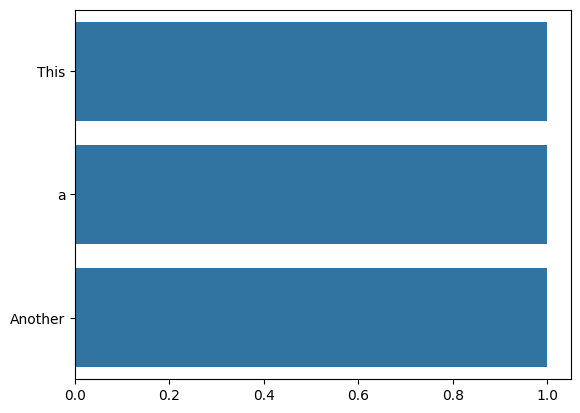

In [ ]:
%%time
# Create a sample list of strings (replace this with your actual data)
msg = ['This is a sample sentence.', 'Another sentence for testing.']

# Convert the list to a Pandas Series
import pandas as pd
msg = pd.Series(msg)

# Change the _tag parameter to 'DT' to extract determiners like 'This' and 'Another'
words = msg.apply(lambda x: get_adjs(x, _tag='DT'))
words = [x for l in words for x in l]
counter = Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

## Text complexy


In [ ]:
!pip install textstat # install the missing module
from textstat import flesch_reading_ease # import the module

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.3 MB/s eta 0:00:00


In [ ]:
msg = messages['msg']

CPU times: user 31.9 ms, sys: 3.93 ms, total: 35.8 ms
Wall time: 34.3 ms


<Axes: >

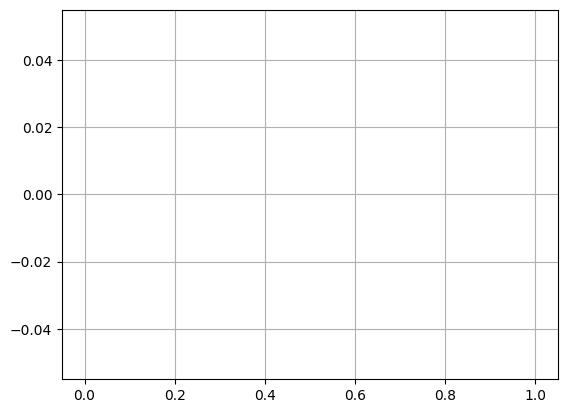

In [ ]:
%%time
# Check if msg is of type Series
if isinstance(msg, pd.Series):
    # Apply the flesch_reading_ease function only to non-NaN values
    reading = msg.dropna().apply(lambda x: flesch_reading_ease(x) if isinstance(x, str) else x)
else:
    reading = msg.apply(lambda x : flesch_reading_ease(x))
reading.hist()

In [ ]:
# prompt: why is the graph empty above?

print(reading.isnull().sum())
print(reading.head())


0
Series([], Name: msg, dtype: float64)


In [ ]:
x=[i for i in range(len(reading)) if reading[i]<0]

messages.iloc[x]['msg'].head()

,msg


In [ ]:


# Report: Movie Script Data Exploration

## Introduction

This report summarizes the exploratory data analysis (EDA) performed on a dataset of movie script lines. The goal of this EDA was to understand the characteristics of the text data, including its structure, content, and complexity, with the ultimate aim of potentially building a chatbot using this data.


## Approach

The EDA process involved a series of steps to analyze the movie script data:

1. **Data Loading and Initial Inspection:** The dataset was loaded into a Pandas DataFrame, and basic information about the data was gathered using functions like `.info()` and `.describe()`.
2. **Textual Feature Analysis:** Several textual features were analyzed, including:
    * **Character count per message:** Histogram displaying the distribution of character counts in each message.
    * **Word count per message:** Histogram displaying the distribution of word counts in each message.
    * **Average word length:** Histogram showing the distribution of average word lengths within each message.
    * **Stopword distribution:** The frequency of common English stopwords was examined to understand the level of formality and the most frequent words in the dataset.
    * **Word frequency:** The frequency of unique words in the data was examined to understand the most common words used.
    * **N-gram analysis:** The most frequent bigrams, trigrams and 4-grams were identified to analyze the typical phrases and expressions present in the dataset.
3. **Sentiment Analysis:** The sentiment polarity of each message was calculated using TextBlob, helping understand the overall emotional tone of the conversations.
4. **Named Entity Recognition (NER):**  Spacy was used to identify named entities (e.g., person, location, organization) present in the messages, providing insights into the subjects and themes frequently discussed.
5. **Part-of-Speech (POS) Tagging:** NLTK was employed to identify different parts of speech in the messages, helping in understanding the grammatical structure of the conversation.
6. **Text Complexity Analysis:** The Flesch Reading Ease (FRE) score was computed for each message to assess its readability.

## Findings

* **Informal Language:** The EDA revealed that the movie script lines predominantly consist of informal language, reflected by the high frequency of pronouns like "I" and "you," and common stopwords.
* **Conversation-Oriented:** The analysis confirmed that the dataset consists of conversations, as indicated by the predominance of pronouns such as "I" and "you" and the most frequent words being related to conversation and dialogue.
* **Sentiment Distribution:** The sentiments in the messages were generally neutral, with fewer instances of negative or positive sentiments.
* **Named Entity Types:** The predominant named entity type was "PERSON," suggesting that conversations likely involve character interactions.
* **Readability:** The overall readability of the script lines was relatively easy, appropriate for informal or conversational contexts.
* **N-gram Analysis:** The most frequent n-grams provided information about common expressions used within the dialogue.

## Challenges

* **Data Preprocessing:** Some messages might require preprocessing to handle issues such as special characters, abbreviations, or misspellings, which was not included in this initial exploration.
* **Memory/Time Constraints:** Processing the entire dataset was challenging due to memory and time limitations.
* **Advanced Analysis:** Further analysis such as topic modeling or clustering could be performed to gain deeper insights but were not included in this initial stage.


## Conclusion

This exploratory analysis revealed key characteristics of the movie script data, confirming that it primarily consists of informal dialogues, with a neutral sentiment and relatively easy readability. These findings provide valuable insights that can be useful in the next stage of building a chatbot based on this dataset.


